Install fastai: 
- cmd run `pip install fastai pygame` 

https://docs.fast.ai/tutorial.vision.html

https://docs.fast.ai/dev/gpu.html

In [64]:
from fastai.vision.all import *
import pygame

pygame 2.1.0 (SDL 2.0.16, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [67]:
import pygame
import pygame.camera

pygame.camera.init()
pygame.camera.list_cameras() #Camera detected or not

['USB Video Device']

In [68]:
cam = pygame.camera.Camera("USB Video Device",(640,480))
cam.start()


In [106]:
# save PULL images
DIR = 'data/pull'
noFiles = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

img = cam.get_image()
pygame.image.save(img, DIR + "/" + str(noFiles) + ".jpg")

In [134]:
# save RELEASE images
DIR = 'data/release'
noFiles = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])

img = cam.get_image()
pygame.image.save(img, DIR + "/" + str(noFiles) + ".jpg")

In [135]:
path = Path('c:/Users/rv/Documents/cc1/ml/python-weki/data') #Path().resolve() # current path
dls = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.1, bs=8) # change bs for real datasets
dls.valid_ds.items[:3]


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


[Path('c:/Users/rv/Documents/cc1/ml/python-weki/data/release/26.jpg'),
 Path('c:/Users/rv/Documents/cc1/ml/python-weki/data/release/25.jpg'),
 Path('c:/Users/rv/Documents/cc1/ml/python-weki/data/pull/28.jpg')]

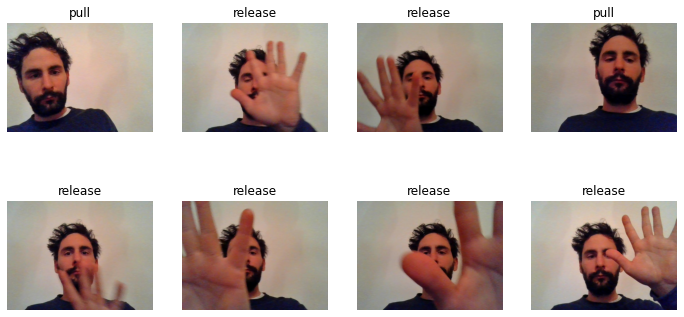

In [137]:
dls.show_batch()

In [138]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()


epoch,train_loss,valid_loss,error_rate,time
0,1.224474,0.736017,0.400000,01:58


epoch,train_loss,valid_loss,error_rate,time
0,0.223978,0.255321,0.000000,02:40


In [ ]:
learn.fine_tune(1)

In [ ]:
# create the interepreation object from our model
interep = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interep.plot_confusion_matrix()

In [146]:
learn.predict('data/pull/10.jpg')

('pull', TensorBase(0), TensorBase([0.5103, 0.4897]))

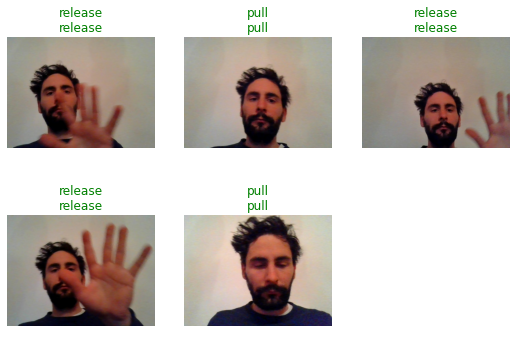

In [142]:
learn.show_results()

In [147]:
cam.stop()

# Export our trained model in form of pickle file
learn.export(fname='classifier.pkl')